# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [1]:
pip install lasio

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import lasio


import plotly.graph_objects as go
import plotly.express       as px

from plotly.subplots import make_subplots

In [2]:
pwd

'/home/ehgeraldo/repos/Well_Log_Plots_Applications'

In [3]:
ls -l

total 7404
-rw-rw-r-- 1 ehgeraldo ehgeraldo  479237 ago 29 22:33 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95981 ago 29 22:34 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  398435 ago 29 22:37 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395962 ago 27 17:19 c3.3-ehgeraldo_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201758 ago 29 17:10 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247083 ago 29 22:30 c6.6-ehgeraldo_matplotlib_subplot.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo    4096 ago 29 19:57 data/


In [4]:
df_raw = lasio.read('/home/ehgeraldo/repos/Well_Log_Plots_Applications/data/15-9-19_SR_COMP.LAS').df()

In [5]:
df_raw.reset_index(inplace=True)

In [6]:
df_raw.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


# Data descrition

In [7]:
df1 = df_raw.copy()

## Data dimensions

In [8]:
print('Number of rows: {}'.format(df_raw.shape[0]))
print('Number of cols: {}'.format(df_raw.shape[1]))

Number of rows: 6701
Number of cols: 8


## Data types

In [9]:
df1.dtypes

DEPT    float64
AC      float64
CALI    float64
DEN     float64
GR      float64
NEU     float64
RDEP    float64
RMED    float64
dtype: object

## Check NAs 

In [10]:
df1.isna().sum()

DEPT      0
AC      122
CALI    122
DEN      45
GR       12
NEU      33
RDEP      0
RMED      0
dtype: int64

In [11]:
df1.sample().T

,4381
DEPT,4283.0984
AC,76.4900
CALI,9.9048
DEN,2.5706
GR,59.6851
NEU,14.3619
RDEP,2.8559
RMED,2.9193


## Replace NAs

In [12]:
#df1 = df1.dropna()

In [13]:
#df1.shape

In [14]:
#print('Removed data: {:.2f}%'.format( 1-( df1.shape[0] / df_raw.shape[0] ) ) )

In [15]:
df1.isna().sum()

DEPT      0
AC      122
CALI    122
DEN      45
GR       12
NEU      33
RDEP      0
RMED      0
dtype: int64

## Data Describe

In [16]:
df1.describe()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6701.000000,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000,6701.000000
mean,4125.974000,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012,3.081261
std,294.826397,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387,6.306741
min,3615.434000,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,3870.704000,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600,0.844800
50%,4125.974000,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000,1.801400
75%,4381.244000,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000,3.537300
max,4636.514000,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


## Descriptive Statistical

In [17]:
num_attributes = df1.select_dtypes('float64')

In [18]:
num_attributes.sample(2)

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
1221,3801.5144,88.0311,9.1429,2.2517,35.8198,18.7254,0.4532,0.5572
1619,3862.1696,75.3547,9.4309,2.5421,5.4417,14.6470,1.5412,2.1206


## Numerical Attributes

In [19]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,DEPT,3615.4340,4636.5140,1021.0800,4125.974000,4125.9740,294.804397,-1.777894e-15,-1.200000
1,AC,1.0251,149.2187,148.1936,78.313607,NaN,17.008242,5.688211e-01,0.188815
2,CALI,6.0000,20.2857,14.2857,9.550656,NaN,0.906198,1.356733e+00,26.107515
3,DEN,2.0377,3.0013,0.9636,2.459291,NaN,0.162669,-7.807570e-01,-0.583874
4,GR,2.7661,304.3337,301.5676,36.048563,NaN,26.703523,3.509568e+00,27.005485
5,NEU,2.1783,146.3474,144.1691,17.986061,NaN,11.693207,2.324613e+00,9.520320
6,RDEP,0.2503,198.5371,198.2868,3.221012,1.7700,8.859726,1.293431e+01,193.265962
7,RMED,0.2947,115.6350,115.3403,3.081261,1.8014,6.306271,1.035734e+01,130.680492


## Line plot Visualization

In [21]:
df1.columns

Index(['DEPT', 'AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED'], dtype='object')

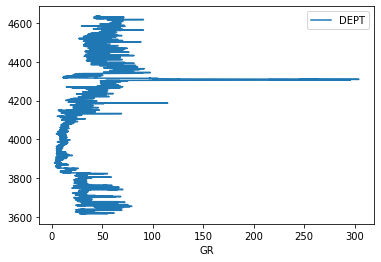

In [22]:
df1.plot('GR','DEPT')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

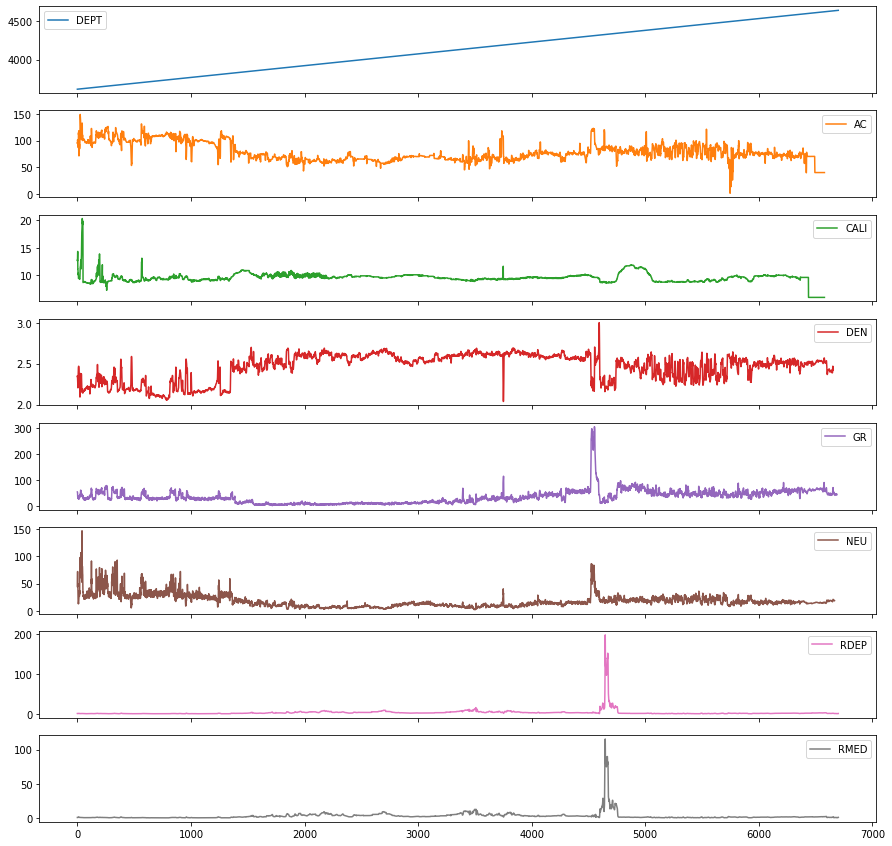

In [23]:
df1.plot(subplots='True', figsize=(15,15))

## Gamma Ray

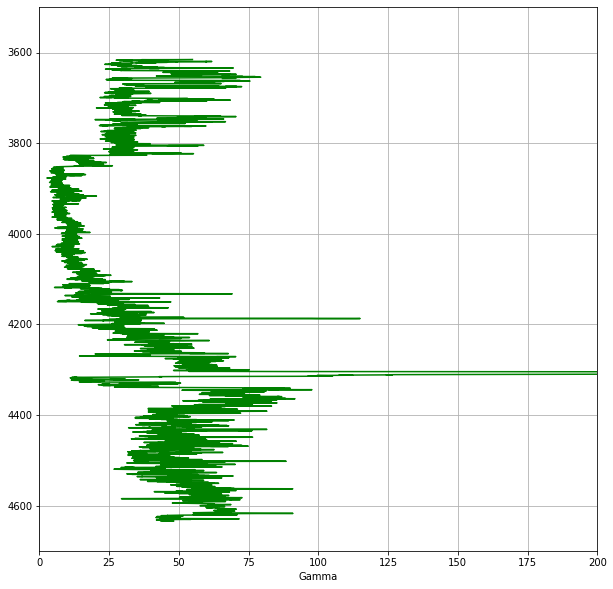

In [24]:
fig = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)


ax1.plot("GR", "DEPT", data=df1, color="green")
ax1.set_xlabel("Gamma")
ax1.set_xlim(0,200)
ax1.set_ylim(4700, 3500)

ax1.grid()


## Resistivity

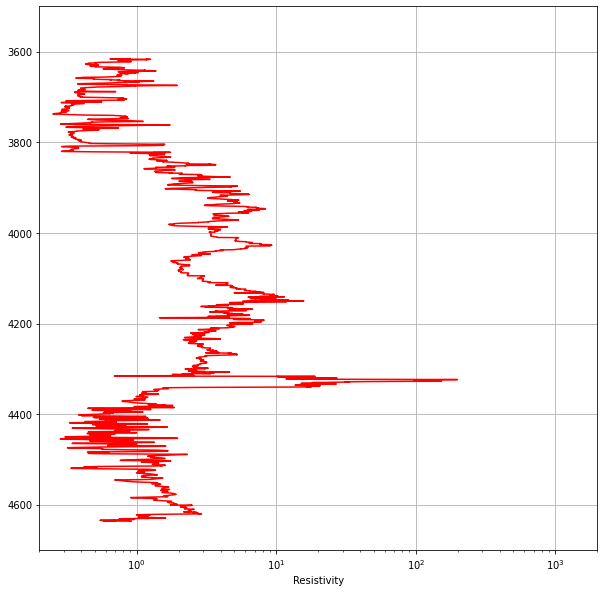

In [25]:
fig = plt.subplots(figsize=(10,10))

ax2 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)


ax2.plot("RDEP", "DEPT", data=df1, color="red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2,2000)
ax2.semilogx()
ax2.set_ylim(4700, 3500)

ax2.grid()

## Gamma and Resistivity

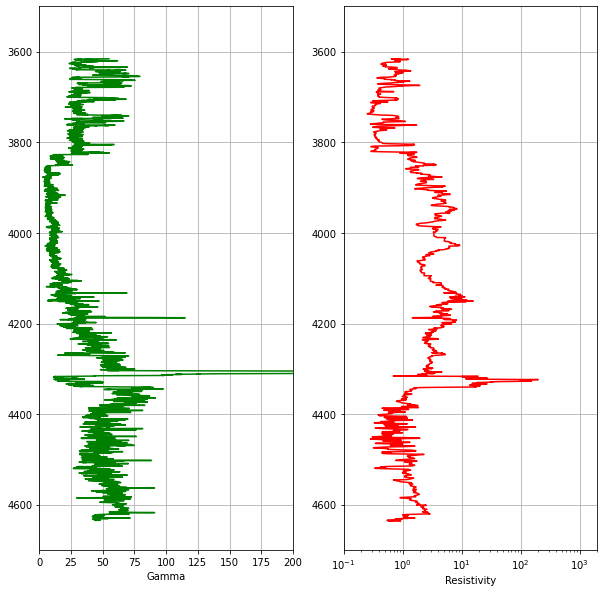

In [26]:
fig = plt.subplots(figsize=(10,10))

# Gamma (1,1), Resistivity (1,2)
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)

ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1)

ax1.plot("GR", "DEPT", data=df1, color="green")
ax1.set_xlabel("Gamma")
ax1.set_xlim(0,200)
ax1.set_ylim(4700, 3500)

ax1.grid()


ax2.plot("RDEP", "DEPT", data=df1, color="red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.1,2000)
ax2.semilogx()
ax2.set_ylim(4700, 3500)

ax2.grid()


## Gamma ray, Resistivity and Density

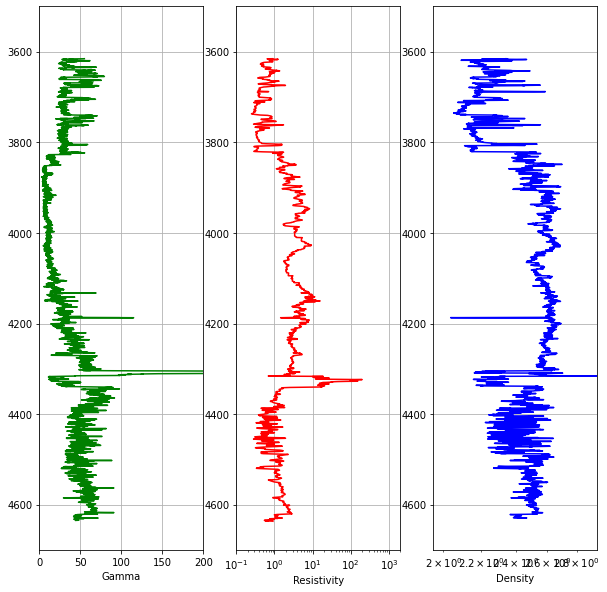

In [27]:
fig = plt.subplots(figsize=(10,10))

# Gamma (1,1), Resistivity (1,2)
ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan=1)

ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan=1)

ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan=1)

# Gamma
ax1.plot("GR", "DEPT", data=df1, color="green")
ax1.set_xlabel("Gamma")
ax1.set_xlim(0,200)
ax1.set_ylim(4700, 3500)

ax1.grid()

#Resistivity
ax2.plot("RDEP", "DEPT", data=df1, color="red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.1,2000)
ax2.semilogx()
ax2.set_ylim(4700, 3500)

ax2.grid()

#Density
ax3.plot("DEN", "DEPT", data=df1, color="blue")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95,2.95)
ax3.semilogx()
ax3.set_ylim(4700, 3500)

ax3.grid()